<a href="https://colab.research.google.com/github/SABRIS13/Machine_Learning/blob/main/%C3%81nalisis_de_datos_de_salud_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ánalisis de datos de Salud**

In [1]:
"""
OCI Data Science - Useful TipsCheck for Public Internet Access
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
Helpful Documentation
Data Science Service Documentation
ADS documentation
Typical Cell Imports and Settings for ADS
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
Useful Environment Variables
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
"""

'\nOCI Data Science - Useful TipsCheck for Public Internet Access\nimport requests\nresponse = requests.get("https://oracle.com")\nassert response.status_code==200, "Internet connection failed"\nHelpful Documentation\nData Science Service Documentation\nADS documentation\nTypical Cell Imports and Settings for ADS\n%load_ext autoreload\n%autoreload 2\n%matplotlib inline\n\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\nimport logging\nlogging.basicConfig(format=\'%(levelname)s:%(message)s\', level=logging.ERROR)\n\nimport ads\nfrom ads.dataset.factory import DatasetFactory\nfrom ads.automl.provider import OracleAutoMLProvider\nfrom ads.automl.driver import AutoML\nfrom ads.evaluations.evaluator import ADSEvaluator\nfrom ads.common.data import ADSData\nfrom ads.explanations.explainer import ADSExplainer\nfrom ads.explanations.mlx_global_explainer import MLXGlobalExplainer\nfrom ads.explanations.mlx_local_explainer import MLXLocalExplainer\nfrom ads.catalog.model import ModelCata

## **1. Creando Notebook**

In [2]:
#import ads
#ads.__version__

In [33]:
import pandas as pd
import numpy as np

### **1.1 Lectura de la base de datos**

In [ ]:
#from ads.dataset.factory import DatasetFactory
#ds = DatasetFactory.open('datos_salud_final.csv')
#ds

In [10]:
data=pd.read_csv('datos_salud_final.csv')

In [5]:
data.head()

,sexo,edad,fumador,cigarrillos_por_dia,uso_medicamento_presion,acv,hipertension,diabetes,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia,categoria_de_fumador,riesgo_eac_decada
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,2,0
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,3,1
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,3,0


In [6]:
#type(ds)
type(data)

pandas.core.frame.DataFrame

In [7]:
data.columns

Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'categoria_de_fumador', 'riesgo_eac_decada'],
      dtype='object')

In [8]:
#ds = DatasetFactory.open('datos_salud_final.csv', target='riesgo_eac_decada')
#ds.head()

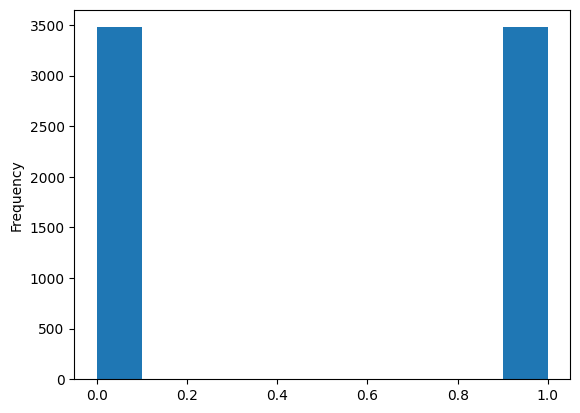

In [19]:
data.riesgo_eac_decada.plot(kind='hist');

In [20]:
#ds.target.show_in_notebook()


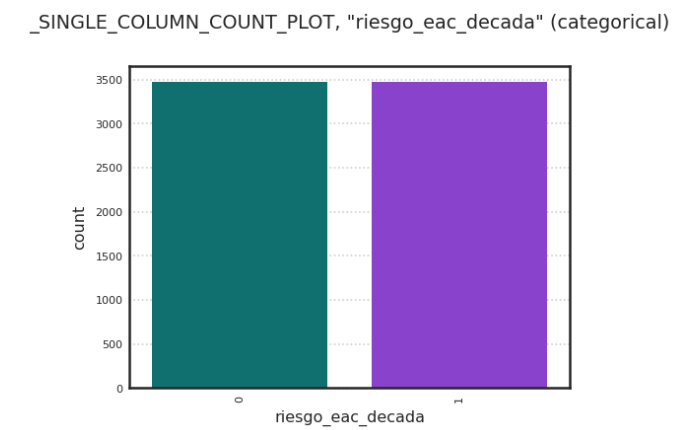

### **1.2 Creando nuestro primer modelo**

In [29]:
x=data[['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
       'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
       'colesterol_total', 'presion_arterial_sistolica',
       'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
       'categoria_de_fumador']]
x

,sexo,edad,fumador,cigarrillos_por_dia,uso_medicamento_presion,acv,hipertension,diabetes,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia,categoria_de_fumador
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,2
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,3
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0,64,0,0,0,0,1,0,229.0,145.0,85.0,29.67,70.0,74.0,0
6950,0,61,1,20,0,0,1,0,245.0,140.0,73.0,30.74,90.0,91.0,2
6951,1,67,0,0,0,0,0,0,214.0,127.5,80.0,22.11,69.0,84.0,0
6952,1,51,1,20,0,0,1,0,260.0,123.0,72.0,26.83,65.0,65.0,2


In [31]:
y=data['riesgo_eac_decada']
y

0       0
1       0
2       0
3       1
4       0
       ..
6949    1
6950    1
6951    1
6952    1
6953    1
Name: riesgo_eac_decada, Length: 6954, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
SEED=42
np.random.seed(SEED)

#train, test = ds.train_test_split()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [37]:
#train.X
x_train

,sexo,edad,fumador,cigarrillos_por_dia,uso_medicamento_presion,acv,hipertension,diabetes,colesterol_total,presion_arterial_sistolica,presion_arterial_diastolica,imc,frecuencia_cardiaca,glicemia,categoria_de_fumador
5381,1,68,0,0,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,0
3879,0,46,1,1,0,0,1,0,332.0,162.5,92.5,26.13,67.0,67.0,0
4669,0,51,1,25,0,0,0,0,327.0,117.0,70.0,18.52,90.0,76.0,3
6465,0,64,0,0,0,0,1,0,173.0,144.0,82.0,22.54,60.0,77.0,0
6056,0,50,0,0,0,0,1,0,234.0,143.0,90.0,29.36,70.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,43,1,20,0,0,0,0,184.0,127.5,81.0,28.31,108.0,75.0,2
5191,1,52,1,20,0,0,0,0,225.0,126.0,75.0,22.18,85.0,100.0,2
5226,0,60,0,0,0,0,1,0,334.0,132.0,94.0,25.38,80.0,98.0,0
5390,1,54,1,43,0,0,0,0,243.0,135.0,92.0,31.30,90.0,65.0,3


In [38]:
y_train
#train.y

5381    1
3879    0
4669    1
6465    1
6056    1
       ..
3772    0
5191    1
5226    1
5390    1
860     0
Name: riesgo_eac_decada, Length: 5215, dtype: int64

In [39]:
y_test #test.y

5487    1
5489    1
2133    0
37      0
2063    0
       ..
3939    0
1741    0
2827    0
5979    1
548     0
Name: riesgo_eac_decada, Length: 1739, dtype: int64

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
primer_modelo = DecisionTreeClassifier()

In [43]:
primer_modelo.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
primer_modelo.score(x_test, y_test)

0.9062679700977573

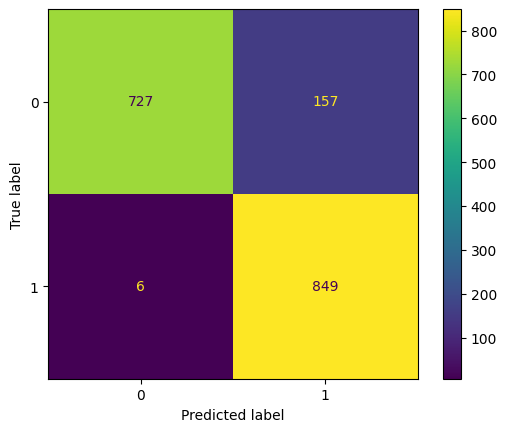

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
matriz = ConfusionMatrixDisplay.from_estimator(estimator=primer_modelo, X= x_test, y= y_test)


### **1.3 Mejorando el primer modelo**

In [57]:
modelo_profundo = DecisionTreeClassifier(max_depth=25)

In [58]:
modelo_profundo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [59]:
modelo_profundo.score(x_test, y_test)

0.9051178838412881

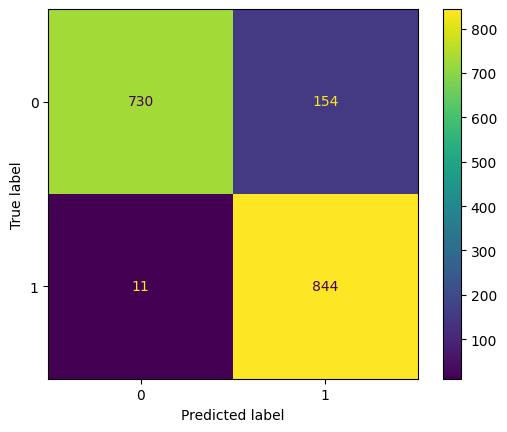

In [60]:
matriz = ConfusionMatrixDisplay.from_estimator(estimator=modelo_profundo, X= x_test, y=y_test)

### **Selección de Feautures**

In [61]:
atributos = primer_modelo.feature_importances_
atributos

array([1.51672475e-02, 1.81477874e-01, 0.00000000e+00, 5.34243438e-02,
       3.04968916e-03, 0.00000000e+00, 8.22554955e-03, 9.71586453e-05,
       1.34422214e-01, 1.51974082e-01, 9.87930071e-02, 1.47974429e-01,
       9.76864164e-02, 1.00682001e-01, 7.02598735e-03])

In [63]:
import pandas as pd

pd.Series(atributos, index= x_train.columns).sort_values()

fumador                        0.000000
acv                            0.000000
diabetes                       0.000097
uso_medicamento_presion        0.003050
categoria_de_fumador           0.007026
hipertension                   0.008226
sexo                           0.015167
cigarrillos_por_dia            0.053424
frecuencia_cardiaca            0.097686
presion_arterial_diastolica    0.098793
glicemia                       0.100682
colesterol_total               0.134422
imc                            0.147974
presion_arterial_sistolica     0.151974
edad                           0.181478
dtype: float64

In [64]:
#train.X.drop(columns='diabetes', axis=1, inplace=True)
x_train.drop(columns='fumador', axis=1, inplace=True) 

In [65]:
#test.X.drop(columns='diabetes', axis=1, inplace=True)
x_test.drop(columns='fumador', axis=1, inplace=True)

In [66]:
x_train.columns

Index(['sexo', 'edad', 'cigarrillos_por_dia', 'uso_medicamento_presion', 'acv',
       'hipertension', 'diabetes', 'colesterol_total',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glicemia', 'categoria_de_fumador'],
      dtype='object')

In [67]:
x_test.columns

Index(['sexo', 'edad', 'cigarrillos_por_dia', 'uso_medicamento_presion', 'acv',
       'hipertension', 'diabetes', 'colesterol_total',
       'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
       'frecuencia_cardiaca', 'glicemia', 'categoria_de_fumador'],
      dtype='object')

In [69]:
primer_modelo.fit(x_train ,y_train)
#primer_modelo.fit(train.X, train.y)

DecisionTreeClassifier()

In [ ]:
primer_modelo.score(x_test, y_test)
#primer_modelo.score(test.X, test.y)

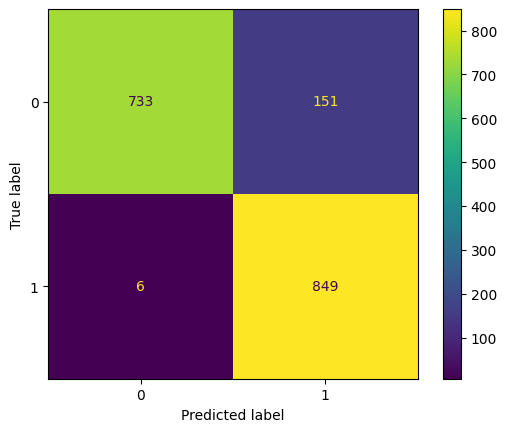

In [70]:
matriz = ConfusionMatrixDisplay.from_estimator(estimator=primer_modelo, X= x_test, y= y_test)
#matriz = ConfusionMatrixDisplay.from_estimator(estimator=primer_modelo, X= test.X, y= test.y)

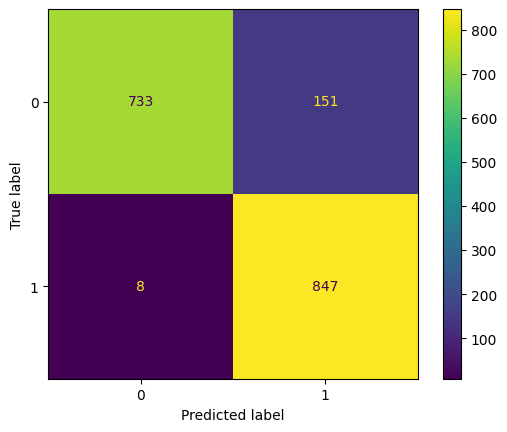

In [71]:
modelo_profundo.fit(x_train ,y_train)
modelo_profundo.score(x_test, y_test)
matriz = ConfusionMatrixDisplay.from_estimator(estimator=modelo_profundo, X= x_test, y= y_test)


## **2. Explorando AutoML de Oracle**

In [72]:
#from ads.common.data import ADSData
#ads_data = ADSData.build(ds.to_pandas(),'riesgo_eac_decada')
#type(ads_data)


In [ ]:
#from ads.automl.driver import AutoML

In [73]:
#oracle_automl = AutoML(ads_data)

In [74]:
#modelo_automl, baseline = oracle_automl.train(score_metric='accuracy', model_list=['DecisionTreeClassifier',
#                                                                                 'SVC', 'LogisticRegression',
#  
#                                                                                'RandomForestClassifier'],
#                                            time_budget=150)

In [75]:
#oracle_automl.print_trials(max_rows=20, sort_column='Mean Validation Score')


In [ ]:
#oracle_automl.visualize_algorithm_selection_trials()


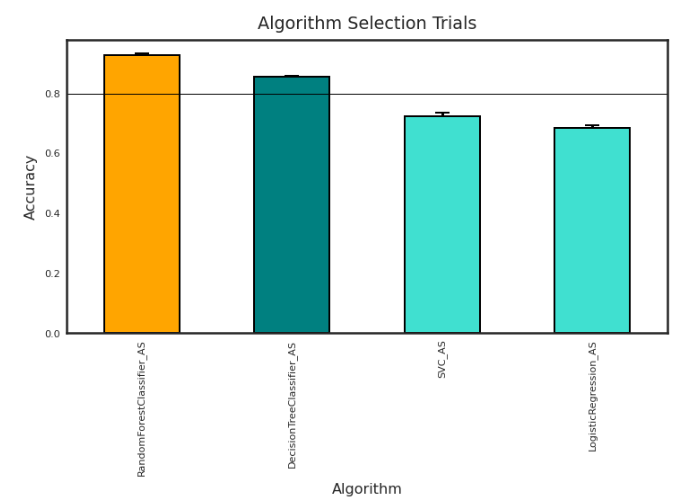

### **2.1 Features y modelo seleccionado**

In [76]:
#modelo_automl.show_in_notebook()

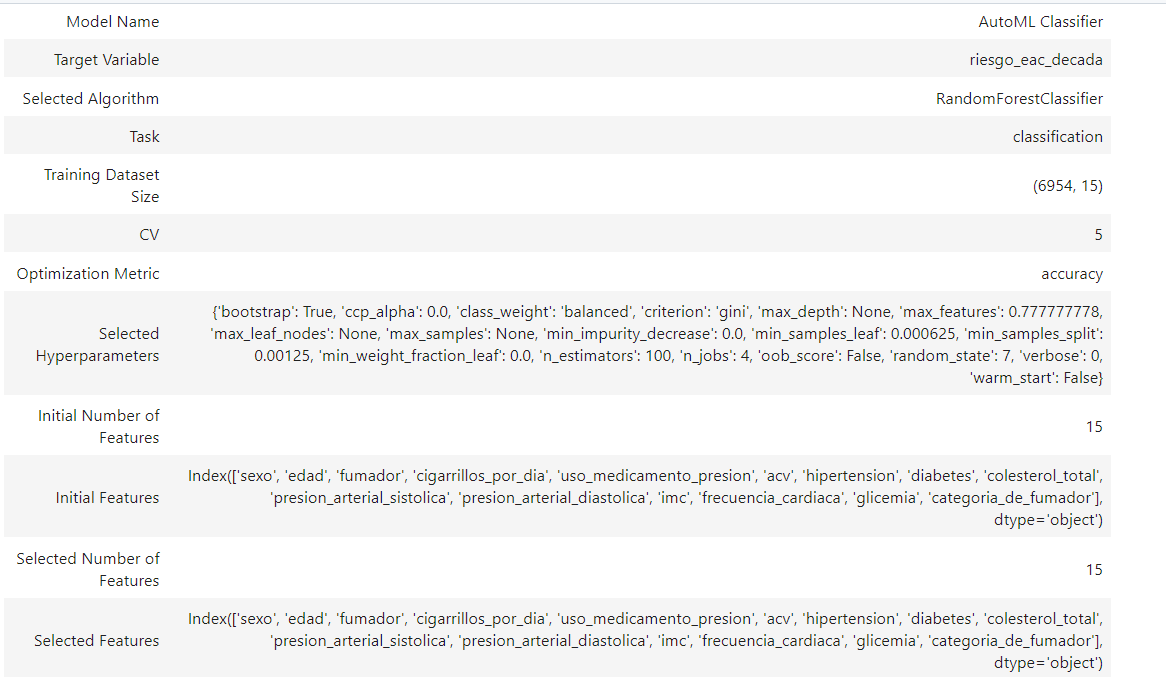

In [79]:
info="""
 
 [['Model Name', 'AutoML Classifier'],
 ['Target Variable', 'riesgo_eac_decada'],
 ['Selected Algorithm', 'RandomForestClassifier'],
 ['Task', 'classification'],
 ['Training Dataset Size', (6954, 15)],
 ['CV', 5],
 ['Optimization Metric', 'accuracy'],
 ['Selected Hyperparameters',
  {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 0.777777778,
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurity_decrease': 0.0,
   'min_samples_leaf': 0.000625,
   'min_samples_split': 0.00125,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 100,
   'n_jobs': 4,
   'oob_score': False,
   'random_state': 7,
   'verbose': 0,
   'warm_start': False}],
 ['Initial Number of Features', 15],
 ['Initial Features',
  Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
         'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
         'colesterol_total', 'presion_arterial_sistolica',
         'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
         'categoria_de_fumador'],
        dtype='object')],
 ['Selected Number of Features', 15],
 ['Selected Features',
  Index(['sexo', 'edad', 'fumador', 'cigarrillos_por_dia',
         'uso_medicamento_presion', 'acv', 'hipertension', 'diabetes',
         'colesterol_total', 'presion_arterial_sistolica',
         'presion_arterial_diastolica', 'imc', 'frecuencia_cardiaca', 'glicemia',
         'categoria_de_fumador'],
        dtype='object')]]
"""

In [80]:
#oracle_automl.visualize_feature_selection_trials()

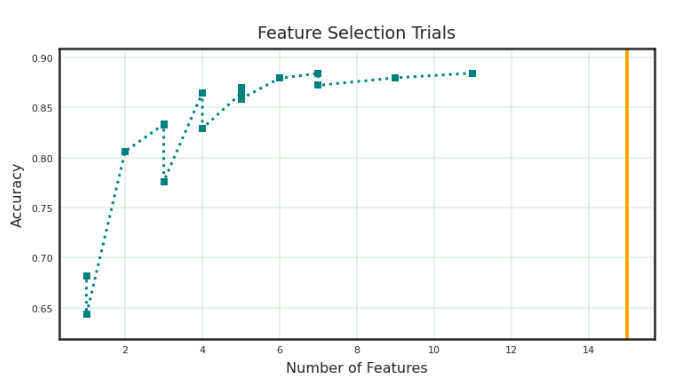

## **3. ADS Evaluator**

In [81]:
# modelo_automl.feature_names()

In [82]:
# train, test = ds[['sexo', 'edad', 'cigarrillos_por_dia', 'uso_medicamento_presion',
#       'hipertension', 'diabetes', 'colesterol_total',
#      'presion_arterial_sistolica', 'presion_arterial_diastolica', 'imc',
#      'frecuencia_cardiaca', 'glicemia', 'categoria_de_fumador','riesgo_eac_decada]]

In [84]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
# modelo_automl.summary()

In [85]:
parametros = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 0.777777778, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 101, 'n_jobs': 8, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}


In [86]:
# mejor_modelo = RandomForestClassifier(**parametros)

In [87]:
# primer_modelo = DecisionTreeClassifier(max_depth=100)


In [88]:
# mejor_modelo.fit(train.X, train.y)
# primer_modelo.fit(train.X, train.y)

In [89]:
# from ads.common.model import ADSModel

In [90]:
# ads_mejor_modelo = ADSModel.from_estimator(mejor_modelo, name='Mejor Modelo')
# ads_primer_modelo = ADSModel.from_estimator(primer_modelo, name='Primer Modelo')

In [91]:
# from ads.evaluations.evaluator import ADSEvaluator

In [92]:
# evaluator = ADSEvaluator(test_data=test,models=[ads_mejor_modelo,ads_primer_modelo],training_data=train)


### **3.1 Analizando las métricas**

In [93]:
#evaluator.show_in_notebook()

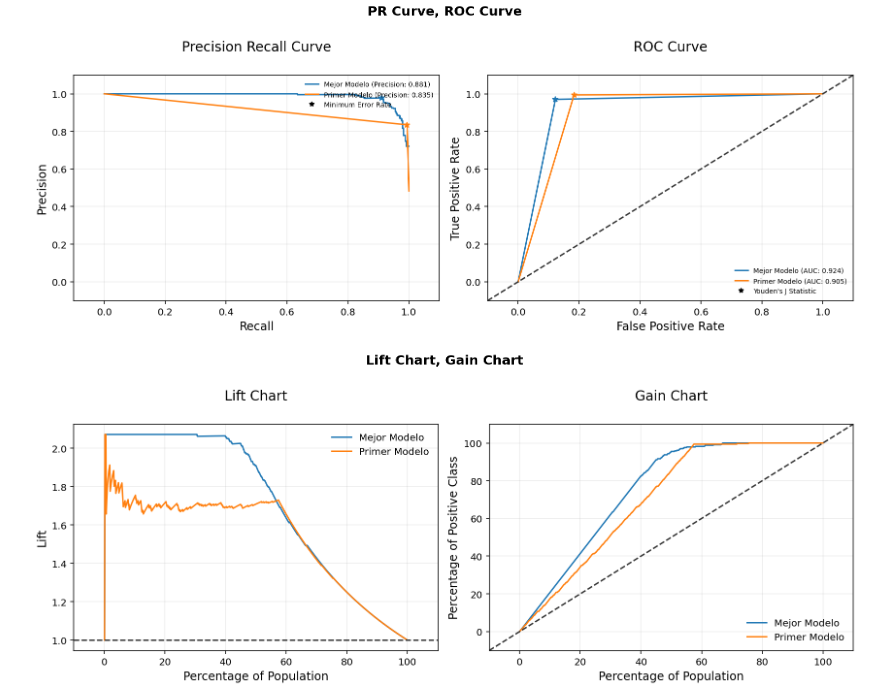

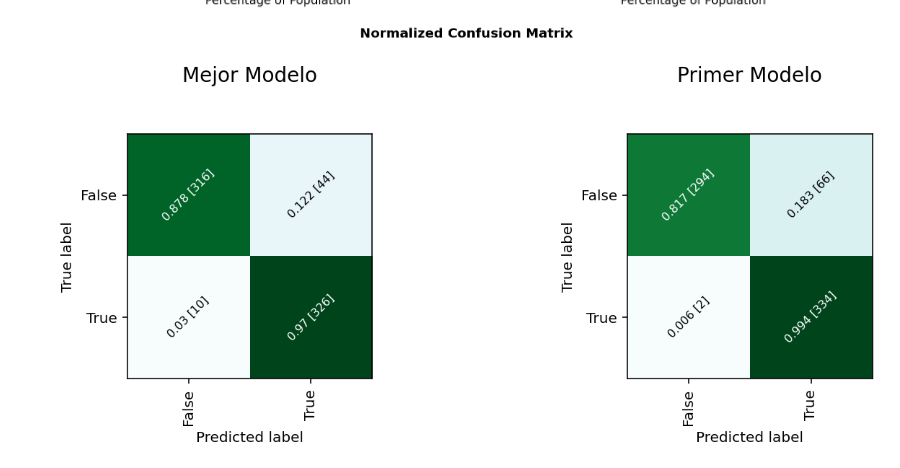

### **3.2 Evaluando más métricas**

In [94]:
#evaluator.metrics

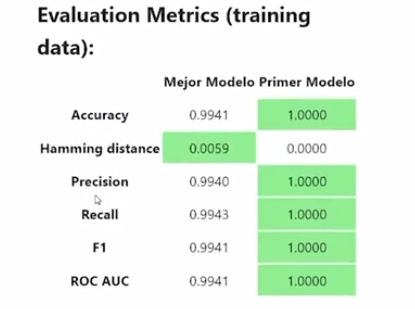

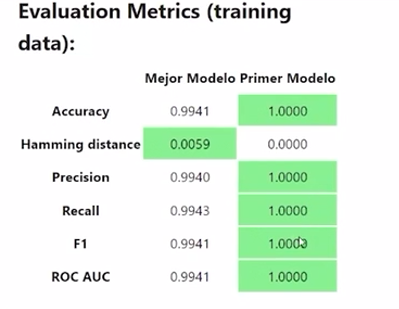

### **3.3 Overfitting**

In [95]:
#primer_modelo = DecisionTreeClassifier(max_depth=5)
#primer_modelo.fit(train.X, train.y)
#ads_primer_modelo = ADSModel.from_estimator(primer_modelo, name='Primer Modelo')

In [96]:
# evaluator = ADSEvaluator(test_data=test,models=[ads_mejor_modelo,ads_primer_modelo],training_data=train)


In [97]:
#evaluator.metrics

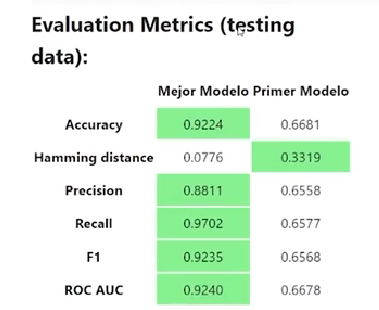

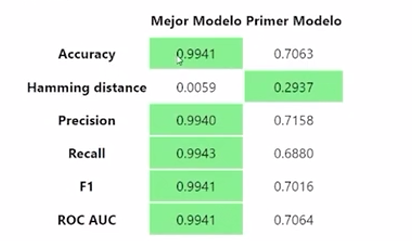

## **4. Model Explainability**

In [ ]:
#from ads.explanations.explainer import ADSExplainer

In [ ]:
#explainer = ADSExplainer(test, ads_mejor_modelo, train)

In [ ]:
#explainer_global = explainer.global_explanation()

In [ ]:
# importance.show_in_notebook('detailed')

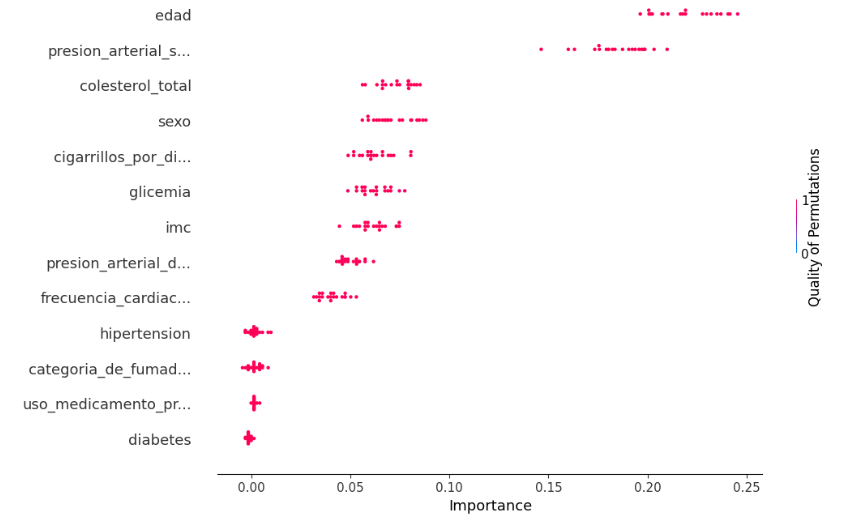

### **4.1 Valores de Features x Clasificación**

In [ ]:
#pdp_edad = explainer_global.compute_partial_dependence('edad')

In [98]:
#pdp_presion = explainer_global.compute_partial_dependence('presion_arterial_sistolica')


In [99]:
#pdp_presion.show_in_notebook()

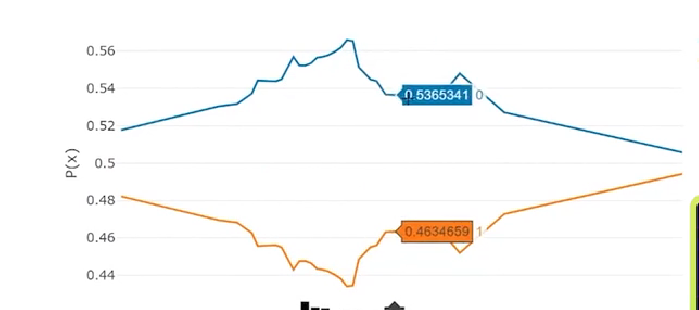

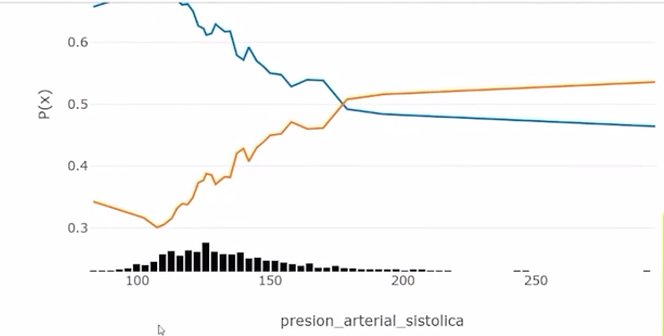

In [100]:
#pdp_edad.show_in_notebook()

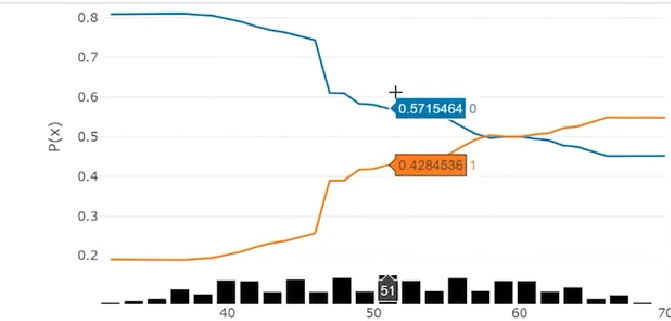

### **4.2 Explicando decisión individual**

In [101]:
#local_explainer = explainer.local_explanation()

In [120]:
#test.X.iloc[[13]]  #Paciente 13

In [103]:
#test.y.iloc[[13]]

In [104]:
#explanation = local_explainer.explain(test.X.iloc[[13]],test.y.iloc[[13]])

In [105]:
#explanation.show_in_notebook()

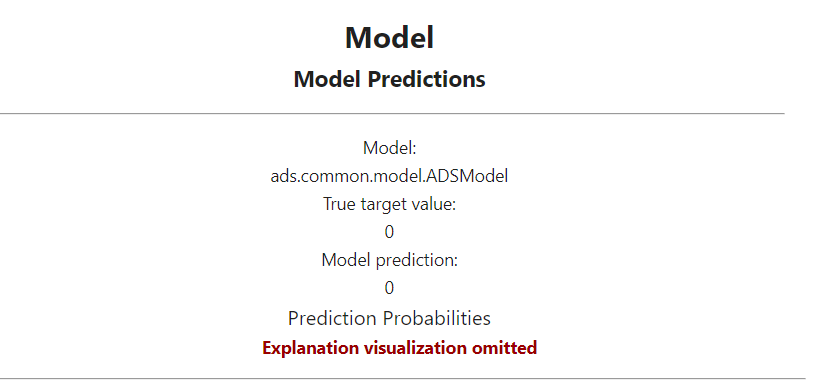

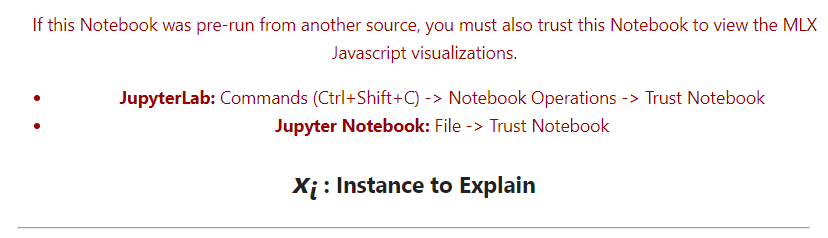

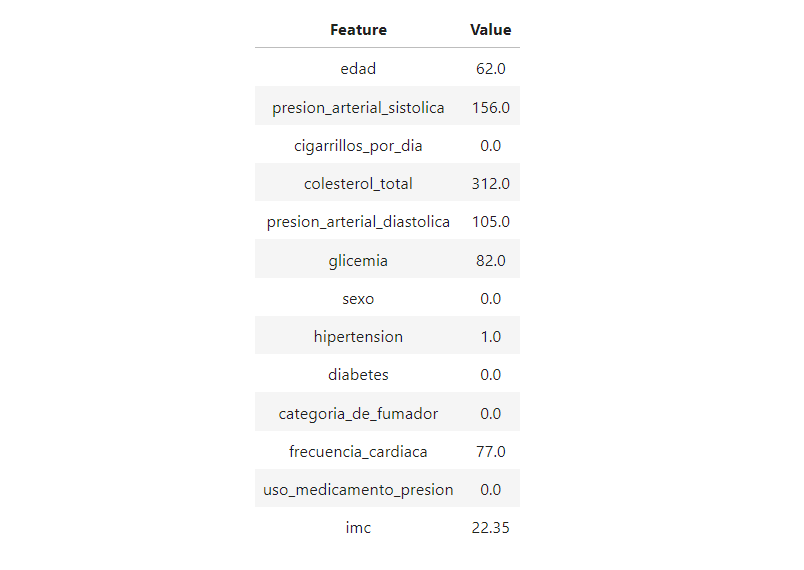

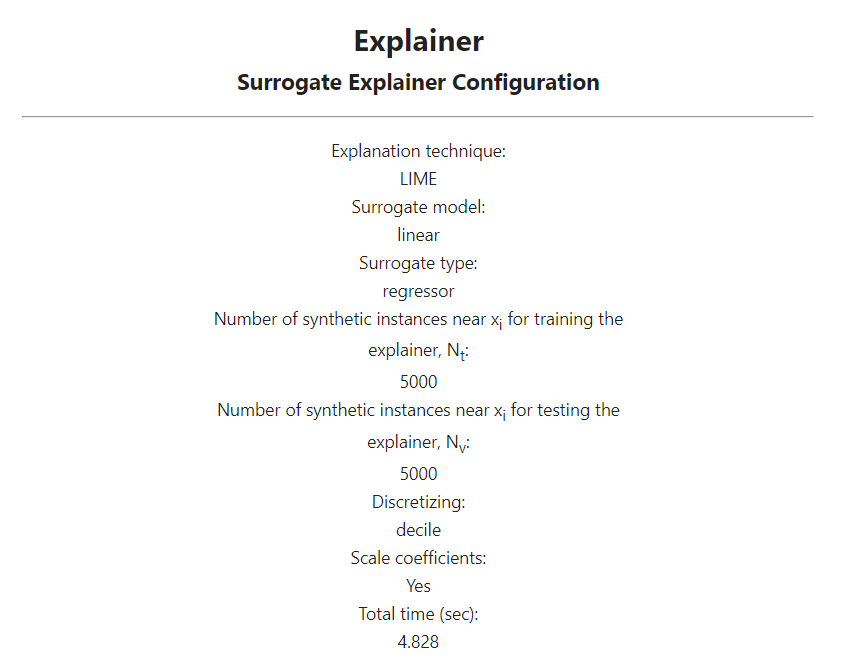

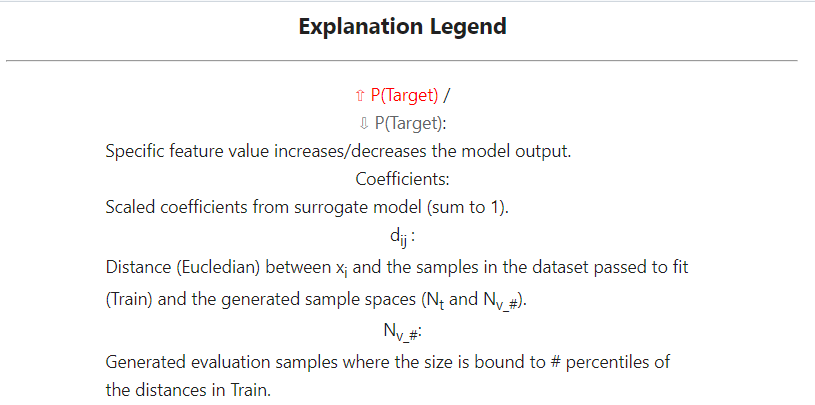

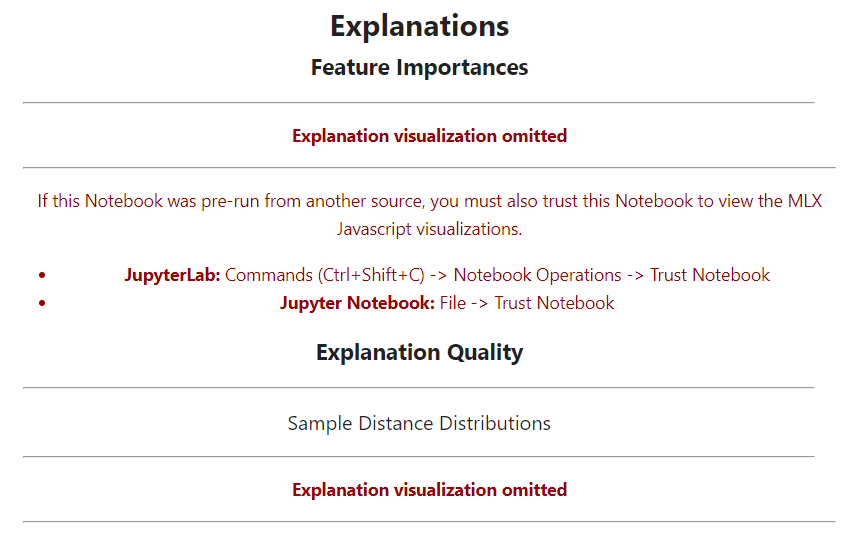

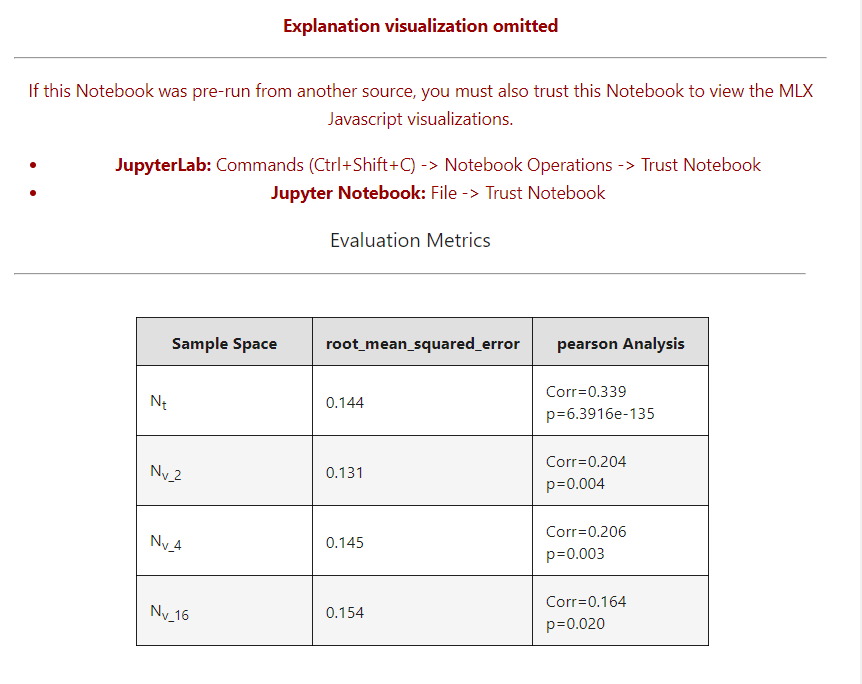

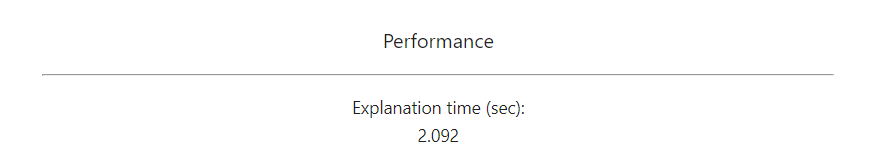

## **5. Creando nuestro artefacto**

In [106]:
#path_artifact = '/home/datascience/modelo'

In [107]:
#artifact_model = ads_mejor_modelo.prepare(path_artifact, data_sample=test, data_science_env=True, force_overwrite=True)

### **5.1 Catálogo de modelos**

In [108]:
#artifact_model.save(display_name='Modelo de Clasificación de EAC')

### **5.2 Importando el modelo del catálogo**

In [109]:
#from ads.catalog.model import ModelCatalog

In [110]:
#mc = ModelCatalog()


In [111]:
#mc_list = mc.list_models()

In [112]:
#mc_list[0]

### **5.3 API del modelo** **texto en negrita**

In [113]:
#model_id = mc_list[0].id

In [114]:
#from ads.model.deployment import ModelDeployer

In [115]:
#deployer = ModelDeployer()

In [116]:
#import os

In [117]:
#deployer.deploy(model_id=model_id,
#               display_name="API del modelo de clasificación de EAC",
#               instance_shape="VM.Standard2.1",
#               instance_count=1,
#               project_id=os.environ["PROJECT_OCID"],
#               compartment_id=os.environ["TENANCY_OCID"])

In [118]:
#body = test.X.iloc[[5,-1],:].to_dict()

In [119]:
# The OCI SDK must be installed for this example to function properly.
# Installation instructions can be found here: https://docs.oracle.com/en-us/iaas/Content/API/SDKDocs/pythonsdk.htm

# import requests
# import oci
# from oci.signer import Signer

# config = oci.config.from_file("~/.oci/config") # replace with the location of your oci config file
# auth = Signer(
#  tenancy=config['tenancy'],
# user=config['user'],
# fingerprint=config['fingerprint'],
# private_key_file_location=config['key_file'],
# pass_phrase=config['pass_phrase'])

# endpoint = 'https://modeldeployment.sa-saopaulo-1.oci.customer-oci.com/ocid1.datasciencemodeldeployment.oc1.sa-saopaulo-1.amaaaaaaqzwhveqabez4udtjlddt4elxxr4fxhw44ded62vrlwyxjxnry6vq/predict'
#body = {} # payload goes here

# requests.post(endpoint, json=body, auth=auth).json()

## **Repo**

[Repositorio](https://github.com/alura-es-cursos/1903-machine-learning-con-oracle-ads-productividad-en-la-creacion-de-modelos/blob/proyecto-final/proyecto_final.ipynb)